#### Activity 3 - Logistic Regression Practice (Iris Data Set and Heart Attack)

Basic Classification Algorithm - Binary Logistic Regression

We would need to practice using a few datasets to understand how logistic regression works.


##### Part 1 - Iris Data Set

Create a separate Jupyter Notebook.

The Iris Data set is comprised of the following features:

- sepal length
- sepal width
- petal length
- petal width
- Iris Species

For this part, create a program that will be based on the logistic regression for each of the Iris Species.

- Create a logistic regression that will determine if the species is SETOSA or not.
- Create a logistic regression that will determine if the species is VERSICOLOR or not.
- Create a logistic regression that will determine if the species is VIRGINICA or not.

The interface should look like the following:
![Iris Data Set UI](https://github.com/Pipaolo/cs-machine-learning/blob/main/images/iris-dataset-ui.png?raw=true)

##### Considerations:

1. Use the minimum and maximum values of the data for validation.

2. For each logistic regression, show the confusion matrix and accuracy of the model.

3. Display the probability of each species.

**\*Warning notes:** Since we will be using this method, there will be times wherein an entry will produce no species or more than one species. \*

##### Discussion of results and reflection

1. How accurate is each model?

2. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer.

3. What are your recommendations for improving the classification of this data det? Explain.

4. Create a graphical model of how the selection of logistic regression works.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import cast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
df = pd.read_csv("../datasets/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


def load_data():
    df = pd.read_csv("../datasets/iris.csv")

    # Create a true target column for every species
    df["setosa"] = np.where(df["iris_species"] == "Iris-setosa", 1, 0)
    df["versicolor"] = np.where(df["iris_species"] == "Iris-versicolor", 1, 0)
    df["virginica"] = np.where(df["iris_species"] == "Iris-virginica", 1, 0)

    x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

    # The y columns comprises of the target columns
    y = df[["setosa", "versicolor", "virginica"]]

    return x, y, df


def split_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size=0.30,
    )
    # Transform the data
    # sc = StandardScaler()
    # x_train = sc.fit_transform(x_train)
    # x_test = sc.transform(x_test)

    return x_train, x_test, y_train, y_test


def predict_data(classifier, values):
    values = np.array(values).reshape(1, -1)

    predictions = classifier.predict(values)
    probabilities = classifier.predict_proba(values)

    return predictions, probabilities


def predict_data_from_test(classifier, x_test):
    y_pred = classifier.predict(x_test)
    y_probs = classifier.predict_proba(x_test)
    return y_pred, y_probs


def show_confusion_matrix(species: str, y_test, y_pred, ax=None):
    cm = confusion_matrix(y_test, y_pred)
    # Show the confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt="g",
        cmap="Blues",
        xticklabels=["Not " + species, species],
        yticklabels=["Not " + species, species],
        ax=ax,
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

In [5]:
x, grouped_y, df = load_data()
x_train, x_test, y_train, y_test = split_data(x, grouped_y)

y_train.head()

,setosa,versicolor,virginica
50,0,1,0
120,0,0,1
93,0,1,0
148,0,0,1
84,0,1,0


In [6]:
# Create the different models for each species
setosa_y_train = y_train["setosa"]
setosa_y_test = y_test["setosa"]
setosa_classifier = LogisticRegression()
setosa_classifier.fit(x_train, setosa_y_train)


versicolor_y_train = y_train["versicolor"]
versicolor_y_test = y_test["versicolor"]
versicolor_classifier = LogisticRegression()
versicolor_classifier.fit(x_train, versicolor_y_train)

virginica_y_train = y_train["virginica"]
virginica_y_test = y_test["virginica"]
virginica_classifier = LogisticRegression()
virginica_classifier.fit(x_train, virginica_y_train)

LogisticRegression()

In [7]:
# Evaluate the different models for each species
from sklearn.model_selection import cross_val_score

setosa_cross_val_score = cross_val_score(
    setosa_classifier, x, grouped_y["setosa"], cv=10
)
versicolor_cross_val_score = cross_val_score(
    versicolor_classifier, x, grouped_y["versicolor"], cv=10
)
virginica_cross_val_score = cross_val_score(
    virginica_classifier, x, grouped_y["virginica"], cv=10
)

print("Setosa Cross Validation Score: ", setosa_cross_val_score.mean())
print("Versicolor Cross Validation Score: ", versicolor_cross_val_score.mean())
print("Virginica Cross Validation Score: ", virginica_cross_val_score.mean())

Setosa Cross Validation Score:  1.0
Versicolor Cross Validation Score:  0.6933333333333332
Virginica Cross Validation Score:  0.9666666666666666


C:\Users\Administrator\AppData\Local\Temp\ipykernel_64332\412389901.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


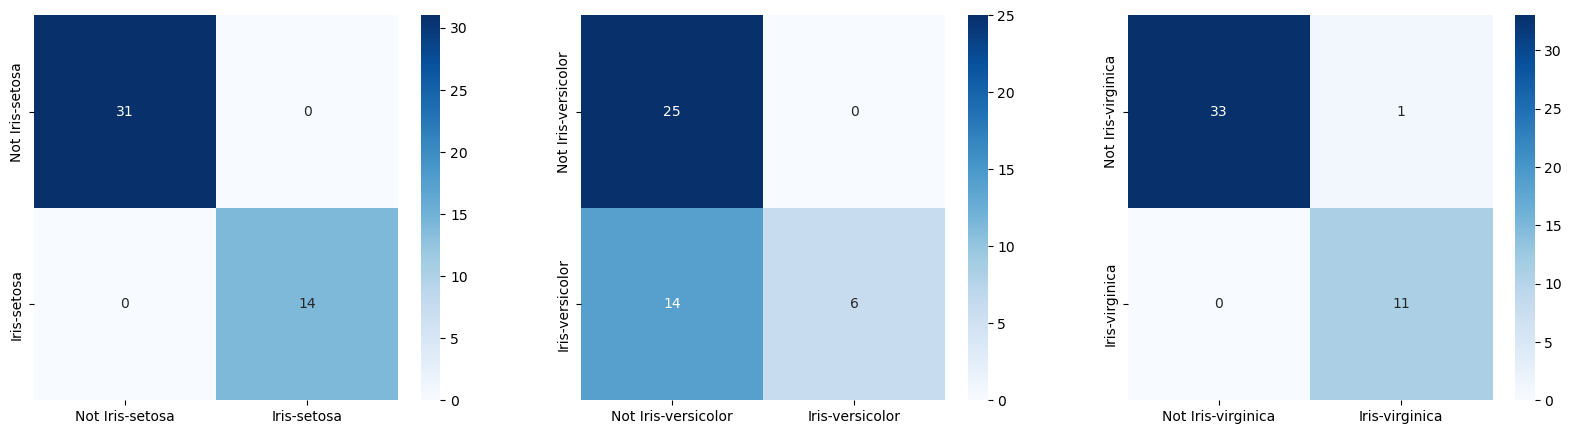

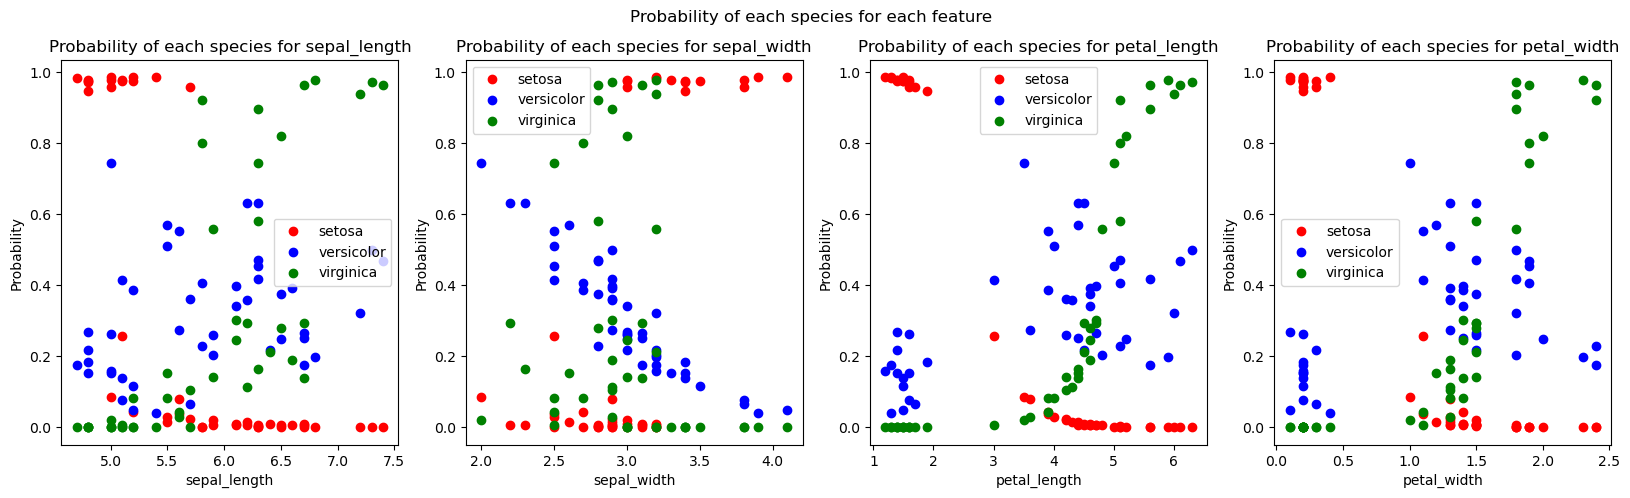

In [8]:
# Show the confusion matrix for each species
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(
    confusion_matrix(setosa_y_test, setosa_classifier.predict(x_test)),
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Not Iris-setosa", "Iris-setosa"],
    yticklabels=["Not Iris-setosa", "Iris-setosa"],
    ax=ax[0],
)
sns.heatmap(
    confusion_matrix(versicolor_y_test, versicolor_classifier.predict(x_test)),
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Not Iris-versicolor", "Iris-versicolor"],
    yticklabels=["Not Iris-versicolor", "Iris-versicolor"],
    ax=ax[1],
)
sns.heatmap(
    confusion_matrix(virginica_y_test, virginica_classifier.predict(x_test)),
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Not Iris-virginica", "Iris-virginica"],
    yticklabels=["Not Iris-virginica", "Iris-virginica"],
    ax=ax[2],
)

fig.show()

# Show the predictions scatter plot graph for each species
setosa_probs = setosa_classifier.predict_proba(x_test)
versicolor_probs = versicolor_classifier.predict_proba(x_test)
virginica_probs = virginica_classifier.predict_proba(x_test)


"""
    Show the predictions graph for each species with their respective features:
    - sepal_length
    - sepal_width
    - petal_length
    - petal_width
"""

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

columns_color_mapping = {0: "red", 1: "blue", 2: "green", 3: "orange"}

scatter_fig, scatter_ax = plt.subplots(1, 4, figsize=(20, 5))
scatter_fig.suptitle("Probability of each species for each feature")

for i in range(len(columns)):
    scatter_ax[i].scatter(
        x_test.iloc[:, i], setosa_probs[:, 1], color=columns_color_mapping[0]
    )
    scatter_ax[i].scatter(
        x_test.iloc[:, i], versicolor_probs[:, 1], color=columns_color_mapping[1]
    )
    scatter_ax[i].scatter(
        x_test.iloc[:, i], virginica_probs[:, 1], color=columns_color_mapping[2]
    )

    scatter_ax[i].set_xlabel(columns[i])
    scatter_ax[i].set_ylabel("Probability")
    scatter_ax[i].set_title("Probability of each species for " + columns[i])
    scatter_ax[i].legend(["setosa", "versicolor", "virginica"])

In [9]:
# Get the min and max values for each feature this will be used for validating the user input
sepal_length_min, sepal_length_max = x_test.iloc[:, 0].min(), x_test.iloc[:, 0].max()
sepal_width_min, sepal_width_max = x_test.iloc[:, 1].min(), x_test.iloc[:, 1].max()
petal_length_min, petal_length_max = x_test.iloc[:, 2].min(), x_test.iloc[:, 2].max()
petal_width_min, petal_width_max = x_test.iloc[:, 3].min(), x_test.iloc[:, 3].max()

min_max_dict = {
    "sepal_length": (sepal_length_min, sepal_length_max),
    "sepal_width": (sepal_width_min, sepal_width_max),
    "petal_length": (petal_length_min, petal_length_max),
    "petal_width": (petal_width_min, petal_width_max),
}

### GUI


In [81]:
# Create the input form for the user to input the features
from tkinter import ttk, StringVar
from ttkthemes import ThemedTk
from typing import List

root = ThemedTk(theme="arc", themebg=True)
root.title("Iris Flower Prediction")


# Create a 4x4 grid
for i in range(6):
    root.columnconfigure(i, weight=1)

# Header
header_label = ttk.Label(root, text="Iris Flower Prediction", font=("Arial", 20))
header_label.grid(row=0, column=0, columnspan=6, pady=10)


def validate_input(input, widget_name, reason):
    if input == "":
        return True

    try:
        input = float(input)
        cleaned_widget_name = widget_name.replace("_input", "").replace(".", "")
        min, max = min_max_dict[cleaned_widget_name]
        # Clamp the input after the user has finished typing
        if reason == "focusout":
            clamped_input = input
            if input < min:
                clamped_input = min
            elif input > max:
                clamped_input = max
            print("Clamped input: ", clamped_input)
            widget = root.nametowidget(widget_name)
            widget.delete(0, "end")
            widget.insert(0, str(clamped_input))

        return True
    except ValueError:
        return False


# Create the input form
def create_input(
    label_text: str,
    name: str,
    row: int,
    column: int,
    default_value: float = 0,
):
    label = ttk.Label(root, text=label_text)
    label.grid(
        row=row,
        column=column,
        sticky="e",
        padx=10,
    )

    vcmd = (root.register(validate_input), "%P", "%W", "%V")
    input = ttk.Entry(root, name=name, validate="all", validatecommand=vcmd)
    input.insert(0, str(default_value))
    input.grid(
        row=row,
        sticky="ew",
        column=column + 1,
        columnspan=2,
    )

    return input


# Create the sepal length input
sepal_length_input = create_input(
    "Sepal Length:",
    "sepal_length_input",
    1,
    0,
    default_value=min_max_dict["sepal_length"][0],
)

# Create the sepal width input
sepal_width_input = create_input(
    "Sepal Width:",
    "sepal_width_input",
    2,
    0,
    default_value=min_max_dict["sepal_width"][0],
)

# Create the petal length input
petal_length_input = create_input(
    "Petal Length:",
    "petal_length_input",
    3,
    0,
    default_value=min_max_dict["petal_length"][0],
)

# Create the petal width input
petal_width_input = create_input(
    "Petal Width:",
    "petal_width_input",
    4,
    0,
    default_value=min_max_dict["petal_width"][0],
)


# Create the output table
output_column = 3
output_row = 1
output_header = ttk.Label(root, text="Iris Species", font=("Arial", 15, "bold"))
output_header.grid(
    row=output_row, column=output_column, pady=10, padx=22, columnspan=3, sticky="w"
)


# Create the output labels
target_names = ["setosa", "versicolor", "virginica"]

# Create the headers
header_frame = ttk.Frame(
    root,
)

header_frame.grid(
    row=output_row + 1,
    column=output_column,
    sticky="nsew",
    columnspan=3,
    padx=22,
    pady=10,
)

output_labels: List[ttk.Label] = []

for i in range(len(target_names)):
    header_label = ttk.Label(
        header_frame,
        text=target_names[i],
        font=("Arial", 12, "bold"),
        border=1,
        relief="solid",
        padding=10,
    )
    header_label.grid(
        row=output_row + 1,
        column=output_column + i,
        padx=1,
        pady=2,
        sticky="nsew",
    )
    output_label = ttk.Label(
        header_frame,
        text="True",
        font=("Arial", 12),
        border=1,
        relief="solid",
        padding=10,
    )
    output_label.grid(
        row=output_row + 2,
        column=output_column + i,
        padx=1,
        pady=2,
        sticky="nsew",
    )
    output_labels.append(output_label)


# Create the main output label
main_output_label = ttk.Label(
    root,
    text="",
    font=("Arial", 12, "bold"),
    border=1,
    relief="solid",
    padding=10,
)
main_output_label.grid(
    row=output_row + 2,
    column=output_column,
    padx=22,
    pady=10,
    columnspan=3,
    sticky="nsew",
)


def on_submit():
    # Get the user input
    sepal_length = float(sepal_length_input.get())
    sepal_width = float(sepal_width_input.get())
    petal_length = float(petal_length_input.get())
    petal_width = float(petal_width_input.get())

    # Make the prediction for each model
    input_values = [[sepal_length, sepal_width, petal_length, petal_width]]

    setosa_prediction = setosa_classifier.predict(input_values)

    versicolor_prediction = versicolor_classifier.predict(input_values)

    virginica_prediction = virginica_classifier.predict(input_values)

    predictions = [
        setosa_prediction[0],
        versicolor_prediction[0],
        virginica_prediction[0],
    ]

    # Update the output labels
    main_output_text = "The species is:"
    predicted_species = []

    for i in range(len(predictions)):
        target = target_names[i]
        is_correct = predictions[i] == i

        if is_correct:
            predicted_species.append(target)

        output_labels[i]["text"] = "TRUE" if is_correct else "FALSE"

    if len(predicted_species) == 0:
        main_output_text = "The species is unknown"
    else:
        main_output_text += " " + ", ".join(predicted_species)

    main_output_label["text"] = main_output_text


# Create the submit button
submit_button = ttk.Button(
    root,
    text="Submit",
    command=on_submit,
)

submit_button.grid(
    row=5,
    column=0,
    sticky="ew",
    padx=10,
    pady=10,
    columnspan=6,
)


root.mainloop()

#### Discussions and Reflection

1. How accurate is each model?

   - Based on the confusion matrix of `[[19  0  0]
[ 0 14  1]
[ 0  0 11]]`, we can say that the model is accurate in classifying the iris data set.

1. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer.

   - Yes, because the data is linearly separable.

1. What are your recommendations for improving the classification of this data det? Explain.

   - The data is already perfect for what it is, curated and functioning as a perfect test for logistic regression.

1. Create a graphical model of how the selection of logistic regression works.
